In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS

In [6]:
edx = pd.read_csv('edx_courses.csv')
edx.sample(4)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
952,A System View of Communications: From Signals ...,Explore the tradeoffs in designing communicati...,"34,261",Self-paced on your time,The Hong Kong University of Science and Techno...,Bertram Shi-Shenghui Song,Introductory,Computer Science,English,English,4–6 hours per week,7 Weeks,FREE-Add a Verified Certificate for $60 USD,Have you ever wondered how information is tran...,NaN,https://www.edx.org/course/a-system-view-of-co...
162,Programming Basics,Learn basic computer programming skills and ma...,"215,059",Self-paced on your time,IITBombay,Deepak B. Phatak-Supratik Chakraborty-Nagesh K...,Introductory,Computer Science,English,English,6–8 hours per week,9 Weeks,FREE-Add a Verified Certificate for $149 USD,Basic concepts of computer programming are int...,NaN,https://www.edx.org/course/programming-basics
292,A-level Mathematics for Year 12 - Course 1: Al...,NaN,"22,366",Self-paced on your time,Imperial College London,Philip Ramsden-Phil Chaffe,Intermediate,Math,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,NaN,NaN,https://www.edx.org/course/a-level-mathematics...
883,The Supreme Court & American Politics,Take a journey through the history of the Unit...,"6,216",Self-paced on your time,University of Baltimore-University System of M...,Lyle Denniston,Introductory,Law,English,English,4–7 hours per week,8 Weeks,FREE-Add a Verified Certificate for $29 USD,The University of Baltimore School of Law and ...,NaN,https://www.edx.org/course/the-supreme-court-a...


In [7]:
edx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

In [8]:
edx.isna().sum()

title                   0
summary                53
n_enrolled            120
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       558
course_url              0
dtype: int64

In [9]:
edx.duplicated().sum()

1

In [10]:
edx[edx.duplicated(keep=False)]

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
59,Introduction to Probability,"Learn probability, an essential language and s...","97,291",Self-paced on your time,Harvard University,Joseph Blitzstein,Intermediate,Data Analysis & Statistics,English,English,5–10 hours per week,10 Weeks,FREE-Add a Verified Certificate for $99 USD,Probability and statistics help to bring logic...,NaN,https://www.edx.org/course/introduction-to-pro...
95,Introduction to Probability,"Learn probability, an essential language and s...","97,291",Self-paced on your time,Harvard University,Joseph Blitzstein,Intermediate,Data Analysis & Statistics,English,English,5–10 hours per week,10 Weeks,FREE-Add a Verified Certificate for $99 USD,Probability and statistics help to bring logic...,NaN,https://www.edx.org/course/introduction-to-pro...


In [11]:
edx = edx.drop_duplicates()

In [12]:
edx.duplicated().sum()

0

# ANALISIS DE LAS COLUMNAS CON NULOS

#### COLUMNA summary

In [15]:
edx[edx['summary'].isna()]

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
45,CS50 for Lawyers,NaN,"87,336",Self-paced on your time,Harvard University,Doug Lloyd-David J. Malan,Introductory,Computer Science,English,English,3–6 hours per week,10 Weeks,FREE-Add a Verified Certificate for $99 USD,NaN,NaN,https://www.edx.org/course/cs50-for-lawyers
52,Introduction to Data Wise: A Collaborative Pro...,NaN,"117,410",Self-paced on your time,Harvard University,Kathryn Parker Boudett,Intermediate,Education & Teacher Training,English,"English, Español",1–2 hours per week,10 Weeks,FREE-Add a Verified Certificate for $70 USD,Educators have an ever-increasing stream of da...,NaN,https://www.edx.org/course/introduction-to-dat...
109,Introduction to Investments,NaN,"91,788",Self-paced on your time,Indian Institute of Management Bangalore,S.G. Badrinath,Intermediate,Business & Management,English,English,3–5 hours per week,5 Weeks,FREE-Add a Verified Certificate for $50 USD,"When you complete this course, you will become...",NaN,https://www.edx.org/course/introduction-to-inv...
165,First Nights - Beethoven's 9th Symphony and th...,NaN,"37,426",Self-paced on your time,Harvard University,Thomas Forrest Kelly,Introductory,Humanities,English,English,3–5 hours per week,3 Weeks,FREE-Add a Verified Certificate for $49 USD,Ludwig van Beethoven’s 9th Symphony premiered ...,NaN,https://www.edx.org/course/first-nights-beetho...
166,Cell Biology: Mitochondria,NaN,"64,142",Self-paced on your time,Harvard University,Robert A. Lue,Introductory,Biology & Life Sciences,English,English,2–4 hours per week,4 Weeks,FREE-Add a Verified Certificate for $99 USD,The cell is a powerful case study to help us e...,NaN,https://www.edx.org/course/cell-biology-mitoch...
169,Creative Thinking: Techniques and Tools for Su...,NaN,"54,787",Self-paced on your time,Imperial College London,Peter Childs,Introductory,Humanities,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,NaN,NaN,https://www.edx.org/course/creative-thinking-t...
206,Introducción a la Regulación Emocional basada ...,NaN,"20,634",Self-paced on your time,Universidad Autónoma de Madrid,Beatriz Rodríguez Vega-Carmen Bayón Pérez-Ánge...,Introductory,Health & Safety,Español,Español,5–6 hours per week,4 Weeks,FREE-Add a Verified Certificate for $49 USD,NaN,NaN,https://www.edx.org/course/introduccion-a-la-r...
232,"Hollywood: History, Industry, Art",NaN,"50,033",Self-paced on your time,University of Pennsylvania,Peter Decherney,Introductory,Communication,English,English,3–4 hours per week,4 Weeks,FREE-Add a Verified Certificate for $169 USD,In this course you will learn about Hollywood ...,NaN,https://www.edx.org/course/hollywood-history-i...
235,Philosophy and Critical Thinking,NaN,"97,175",Self-paced on your time,The University of Queensland,Professor Deborah Brown-Dr Peter Ellerton,Introductory,Humanities,English,English,1–4 hours per week,6 Weeks,FREE-Add a Verified Certificate for $99 USD,What can we learn through philosophical inquir...,NaN,https://www.edx.org/course/philosophy-and-crit...
271,Introducción al desarrollo de aplicaciones web,NaN,"27,757",Self-paced on your time,Universidad Autónoma de Madrid,Ruth Cobos Pérez-Álvaro Ortigosa-Roberto Lator...,Introductory,Computer Science,Español,Español,4–5 hours per week,5 Weeks,FREE-Add a Verified Certificate for $49 USD,NaN,NaN,https://www.edx.org/course/introduccion-al-des...


#### COLUMNA n_enrolled

In [16]:
edx[edx['n_enrolled'].isna()]

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
13,English Grammar and Style,Learn key concepts and strategies in grammar a...,NaN,Instructor-led on a course schedule,The University of Queensland,Roslyn Petelin,Introductory,Humanities,English,English,3–4 hours per week,8 Weeks,FREE-Add a Verified Certificate for $99 USD,With the rise of social media and the Internet...,"In Week 1 , we'll introduce you to the course ...",https://www.edx.org/course/english-grammar-and...
459,Business Communication,Learn how to effectively communicate and build...,NaN,Self-paced on your time,Rochester Institute of Technology,Andrea Hickerson-Keri Barone,Introductory,Communication,English,English,4–6 hours per week,3 Weeks,FREE-Add a Verified Certificate for $199 USD,Business communication is vital to professiona...,NaN,https://www.edx.org/course/business-communicat...
462,Agua 2.0: empresas eficientes para el siglo XXI,El curso te presenta una visión integral de la...,NaN,Self-paced on your time,Inter-American Development Bank,Sergio Campos-Corinne Cathala-Federico Pérez,Introductory,Business & Management,Español,Español,2–3 hours per week,8 Weeks,FREE-Add a Verified Certificate for $25 USD,¿Eres un profesional o actor activo del sector...,Módulo 1 - Las empresas de agua y saneamiento ...,https://www.edx.org/course/agua-20-empresas-ef...
494,Introduction to Cloud Computing,"Master the core concepts in Cloud Computing, f...",NaN,Self-paced on your time,IBM,Rav Ahuja,Introductory,Computer Science,English,English,1–2 hours per week,6 Weeks,FREE-Add a Verified Certificate for $49 USD,This course introduces you to the core concept...,Module 1: Overview of Cloud ComputingModule 2:...,https://www.edx.org/course/introduction-to-clo...
502,SQL aplicado en la ciencia de datos,Aprende a usar y aplicar el poderoso lenguaje ...,NaN,Self-paced on your time,IBM,Rav Ahuja,Introductory,Data Analysis & Statistics,Español,Español,2–4 hours per week,4 Weeks,FREE-Add a Verified Certificate for $39 USD,Gran parte de los datos del mundo viven en bas...,NaN,https://www.edx.org/course/sql-aplicado-en-la-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,Drones and Autonomous Systems 2: Applications ...,Learn the latest applications of unmanned aeri...,NaN,Self-paced on your time,University of Maryland Global Campus-Universit...,"Brian Powers, M.A.",Intermediate,Science,English,English,2–3 hours per week,6 Weeks,FREE-Add a Verified Certificate for $149 USD,If you want to be the technology specialist wh...,"Week 1: Introduction to hazards, disasters and...",https://www.edx.org/course/drones-and-autonomo...
968,MathTrackX: Differential Calculus,Discover concepts and techniques relating to d...,NaN,Self-paced on your time,University of Adelaide,Dr Melissa Humphries-Dr Danny Stevenson-Dr Dav...,Introductory,Math,English,English,3–6 hours per week,4 Weeks,FREE-Add a Verified Certificate for $79 USD,This course is part three of the MathTrackX XS...,NaN,https://www.edx.org/course/mathtrackx-differen...
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",NaN,Self-paced on your time,Inter-American Development Bank,Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...,Intermediate,Social Sciences,English,English,4–5 hours per week,10 Weeks,FREE-Add a Verified Certificate for $25 USD,The high rates of crime and violence are two o...,NaN,https://www.edx.org/course/leaders-in-citizen-...
971,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,NaN,Self-paced on your time,Tsinghua University,Yuehua Nie,Introductory,Art & Culture,中文,"English, 中文",3–5 hours per week,12 Weeks,FREE-Add a Verified Certificate for $139 USD,Are you an original designer? Or a DIY fancier...,NaN,https://www.edx.org/course/pattern-studying-an...


In [17]:
edx['n_enrolled']

0        124,980
1        293,864
2      2,442,271
3        129,555
4         81,140
         ...    
970          NaN
971          NaN
972       11,246
973        8,775
974          NaN
Name: n_enrolled, Length: 974, dtype: object

In [18]:
edx['n_enrolled']=edx['n_enrolled'].str.replace(',','')

In [19]:
edx['n_enrolled']=edx['n_enrolled'].astype(float)

In [20]:
edx['n_enrolled'].fillna(0,inplace=True)

In [21]:
edx['n_enrolled']

0       124980.0
1       293864.0
2      2442271.0
3       129555.0
4        81140.0
         ...    
970          0.0
971          0.0
972      11246.0
973       8775.0
974          0.0
Name: n_enrolled, Length: 974, dtype: float64

#### COLUMNA instructors

In [22]:
edx[edx['instructors'].isna()]

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
390,Analytics in Python,Learn the fundamental of programming in Python...,82210.0,Instructor-led on a course schedule,Columbia University,NaN,Intermediate,Business & Management,English,NaN,8–10 hours per week,12 Weeks,FREE-Add a Verified Certificate for $249 USD,Data is the lifeblood of an organization. Comp...,NaN,https://www.edx.org/course/analytics-in-python
401,Just Reading and Writing in English | 生活英语读写,Learn how to read and write in English in the ...,33303.0,Self-paced on your time,Tsinghua University,NaN,Introductory,Art & Culture,English,English,2–4 hours per week,15 Weeks,FREE-Add a Verified Certificate for $149 USD,Reading enriches our life and writing enables ...,Week 1 - Learning\nIntroduction to the problem...,https://www.edx.org/course/just-reading-and-wr...
516,"Data, Models and Decisions in Business Analytics",Learn fundamental tools and techniques for usi...,36289.0,Instructor-led on a course schedule,Columbia University,NaN,Advanced,Business & Management,English,NaN,8–10 hours per week,12 Weeks,FREE-Add a Verified Certificate for $249 USD,"In today’s world, managerial decisions are inc...",NaN,https://www.edx.org/course/data-models-and-dec...


#### COLUMNA subtitles

In [23]:
edx[edx['subtitles'].isna()]

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
390,Analytics in Python,Learn the fundamental of programming in Python...,82210.0,Instructor-led on a course schedule,Columbia University,NaN,Intermediate,Business & Management,English,NaN,8–10 hours per week,12 Weeks,FREE-Add a Verified Certificate for $249 USD,Data is the lifeblood of an organization. Comp...,NaN,https://www.edx.org/course/analytics-in-python
516,"Data, Models and Decisions in Business Analytics",Learn fundamental tools and techniques for usi...,36289.0,Instructor-led on a course schedule,Columbia University,NaN,Advanced,Business & Management,English,NaN,8–10 hours per week,12 Weeks,FREE-Add a Verified Certificate for $249 USD,"In today’s world, managerial decisions are inc...",NaN,https://www.edx.org/course/data-models-and-dec...
640,Ecodesign for Cities and Suburbs,NaN,28472.0,Self-paced on your time,University of British Columbia,Jonathan Barnett-Larry Beasley,Introductory,Environmental Studies,English,NaN,4–5 hours per week,6 Weeks,FREE-Add a Verified Certificate for $99 USD,Too often modern cities and suburbs are disorg...,Week 1: How the usual urban growth model opera...,https://www.edx.org/course/ecodesign-for-citie...


#### COLUMNA course_description

In [24]:
edx[edx['course_description'].isna()]

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
12,Bitcoin and Cryptocurrencies,This course is part of a Professional Certificate,83398.0,Self-paced on your time,"University of California, Berkeley",Rustie Lin-Mengyi (Gloria) Wang,Introductory,Computer Science,English,English,3–5 hours per week,6 Weeks,FREE-Add a Verified Certificate for $99 USD,NaN,NaN,https://www.edx.org/course/bitcoin-and-cryptoc...
21,CS50's Introduction to Game Development,This course is part of a Professional Certificate,346748.0,Self-paced on your time,Harvard University,David J. Malan-Colton Ogden,Intermediate,Computer Science,English,English,6–9 hours per week,12 Weeks,FREE-Add a Verified Certificate for $149 USD,NaN,NaN,https://www.edx.org/course/cs50s-introduction-...
45,CS50 for Lawyers,NaN,87336.0,Self-paced on your time,Harvard University,Doug Lloyd-David J. Malan,Introductory,Computer Science,English,English,3–6 hours per week,10 Weeks,FREE-Add a Verified Certificate for $99 USD,NaN,NaN,https://www.edx.org/course/cs50-for-lawyers
169,Creative Thinking: Techniques and Tools for Su...,NaN,54787.0,Self-paced on your time,Imperial College London,Peter Childs,Introductory,Humanities,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,NaN,NaN,https://www.edx.org/course/creative-thinking-t...
173,CS50's Understanding Technology,This course is part of a XSeries Program,50030.0,Self-paced on your time,Harvard University,David J. Malan,Introductory,Computer Science,English,English,2–6 hours per week,6 Weeks,FREE-Add a Verified Certificate for $90 USD,NaN,NaN,https://www.edx.org/course/cs50s-understanding...
206,Introducción a la Regulación Emocional basada ...,NaN,20634.0,Self-paced on your time,Universidad Autónoma de Madrid,Beatriz Rodríguez Vega-Carmen Bayón Pérez-Ánge...,Introductory,Health & Safety,Español,Español,5–6 hours per week,4 Weeks,FREE-Add a Verified Certificate for $49 USD,NaN,NaN,https://www.edx.org/course/introduccion-a-la-r...
271,Introducción al desarrollo de aplicaciones web,NaN,27757.0,Self-paced on your time,Universidad Autónoma de Madrid,Ruth Cobos Pérez-Álvaro Ortigosa-Roberto Lator...,Introductory,Computer Science,Español,Español,4–5 hours per week,5 Weeks,FREE-Add a Verified Certificate for $49 USD,NaN,NaN,https://www.edx.org/course/introduccion-al-des...
292,A-level Mathematics for Year 12 - Course 1: Al...,NaN,22366.0,Self-paced on your time,Imperial College London,Philip Ramsden-Phil Chaffe,Intermediate,Math,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,NaN,NaN,https://www.edx.org/course/a-level-mathematics...
293,Blockchain Technology,This course is part of a Professional Certificate,55376.0,Self-paced on your time,"University of California, Berkeley",Rustie Lin-Nadir Akhtar,Intermediate,Computer Science,English,English,3–5 hours per week,6 Weeks,FREE-Add a Verified Certificate for $99 USD,NaN,NaN,https://www.edx.org/course/blockchain-technology
318,Academic writing for clarity and meaning,NaN,16220.0,Self-paced on your time,Wits University,Peter Alkema-Nomusa Mazonde-Terri Carmichael,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,NaN,NaN,https://www.edx.org/course/academic-writing-fo...


#### COLUMNA course_syllabus       

In [19]:
edx[edx['course_syllabus'].isna()].head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864.0,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271.0,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...",129555.0,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,81140.0,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...
5,Introduction to Project Management,Learn the principles of project management and...,301793.0,Self-paced on your time,University of Adelaide,Frank Schultmann-Noel Lindsay-Anton Jordaan-Jo...,Introductory,Business & Management,English,English,2–3 hours per week,6 Weeks,FREE-Add a Verified Certificate for $199 USD,Project management is an essential skill-set f...,NaN,https://www.edx.org/course/introduction-to-pro...


# WORDCLOUD

In [26]:
title_corpus = ' '.join(edx['title'])

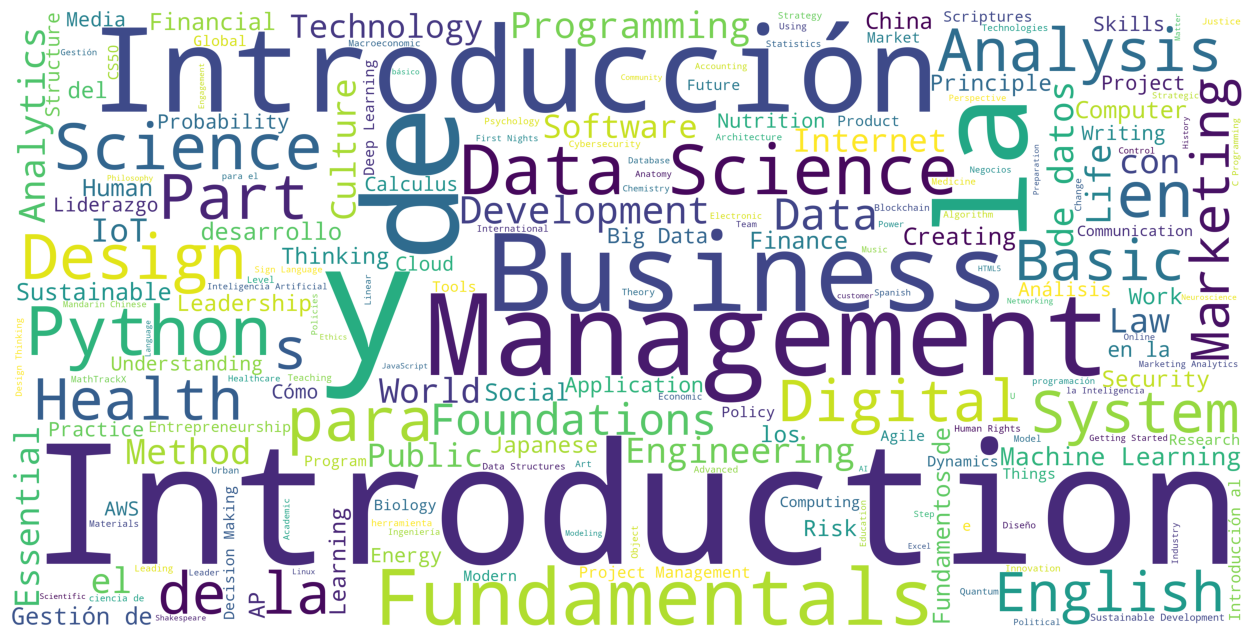

In [27]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',height=2000,width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

# ANALISIS EN BASE A LA COLUMNA n_enrolled

In [20]:
#Para un mejor analisis reordenamos la columna de los matriculados en un curso y las ordenamos de mayor a menor en otro dataFrame llamado cursos y luego seleccionamos los diez primeros
cursos = edx.sort_values('n_enrolled',ascending=False) 
# Primero extraemos el precio del certificado para analizarlo con respecto a los alumnos matriculados
cursos['price_certificate'] = cursos['price'].str.split(' ').str[-2]
cursos['price_certificate'] = cursos['price_certificate'].apply(lambda x: float(x.replace('$','')))
cursos_top_10=cursos.head(10)
cursos_top_10

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url,price_certificate
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271.0,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...,90.0
29,IELTS Academic Test Preparation,Prepare for the IELTS Academic tests in this c...,1103777.0,Self-paced on your time,The University of Queensland,Iain Mathieson-Martin Dutton-Megan Yucel-Steph...,Introductory,Communication,English,English,5–10 hours per week,8 Weeks,FREE-Add a Verified Certificate for $99 USD,IELTS is the world's most popular English lang...,MODULE 1: LISTENING\nThe module begins with an...,https://www.edx.org/course/ielts-academic-test...,99.0
31,TOEFL® Test Preparation: The Insider’s Guide,Prepare for the TOEFL® test and learn how to i...,1022489.0,Self-paced on your time,Educational Testing Service,Michael Knab-Cynthia Newman-Shawn Gorman-Molly...,Introductory,Communication,English,English,2–4 hours per week,6 Weeks,FREE-Add a Verified Certificate for $49 USD,"This test preparation course, developed by the...",NaN,https://www.edx.org/course/toefl-test-preparat...,49.0
23,CS50's Web Programming with Python and JavaScript,"This course picks up where CS50 leaves off, di...",698950.0,Self-paced on your time,Harvard University,David J. Malan-Brian Yu,Intermediate,Computer Science,English,English,6–9 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"Topics include database design, scalability, s...",NaN,https://www.edx.org/course/cs50s-web-programmi...,90.0
64,Introduction to Linux,Never learned Linux? Want a refresh? Develop a...,642088.0,Self-paced on your time,The Linux Foundation,Jerry Cooperstein,Introductory,Computer Science,English,English,5–7 hours per week,14 Weeks,FREE-Add a Verified Certificate for $199 USD,Develop a good working knowledge of Linux usin...,NaN,https://www.edx.org/course/introduction-to-linux,199.0
16,Data Science: R Basics,Build a foundation in R and learn how to wrang...,528782.0,Self-paced on your time,Harvard University,Rafael Irizarry,Introductory,Data Analysis & Statistics,English,English,1–2 hours per week,8 Weeks,FREE-Add a Verified Certificate for $49 USD,The first in our Professional Certificate Prog...,NaN,https://www.edx.org/course/data-science-r-basics,49.0
48,The Science of Happiness,The first MOOC to teach positive psychology. L...,475614.0,Self-paced on your time,"University of California, Berkeley",Dacher Keltner-Emiliana Simon-Thomas,Introductory,Social Sciences,English,English,4–5 hours per week,11 Weeks,FREE-Add a Verified Certificate for $169 USD,"""A free eight-week Science of Happiness course...",NaN,https://www.edx.org/course/the-science-of-happ...,169.0
24,Contract Law: From Trust to Promise to Contract,"Contracts are a part of our everyday life, ari...",414181.0,Self-paced on your time,Harvard University,Charles Fried,Intermediate,Business & Management,English,English,3–6 hours per week,8 Weeks,FREE-Add a Verified Certificate for $125 USD,Learn about contracts from Harvard Law Profess...,NaN,https://www.edx.org/course/contract-law-from-t...,125.0
30,The Architectural Imagination,Learn fundamental principles of architecture —...,406181.0,Self-paced on your time,Harvard University,Lisa Haber-Thomson-K. Michael Hays-Erika Nagin...,Introductory,Architecture,English,English,3–5 hours per week,10 Weeks,FREE-Add a Verified Certificate for $99 USD,Architecture engages a culture’s deepest socia...,Part I: Form and History Part II: The Technolo...,https://www.edx.org/course/the-architectural-i...,99.0
35,Basic Spanish 1: Getting Started,Learn Spanish and expl

### PRIMERO VISULIZAREMOS QUE NIVELES SON MAS ABUDANTES EN LA DATA

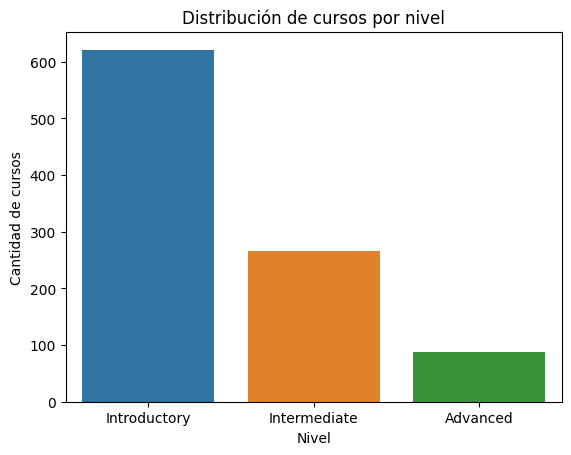

In [24]:
sns.countplot(data=cursos, x='Level', order=cursos['Level'].value_counts().index)
plt.xlabel('Nivel')
plt.ylabel('Cantidad de cursos')
plt.title('Distribución de cursos por nivel')
plt.show()

In [34]:
# Este filtro me ayuda a ver la cantidad exacta de cursos con su respectivo Level
filtro_level = cursos[cursos['Level']=='Introductory']
filtro_level.shape

(621, 17)

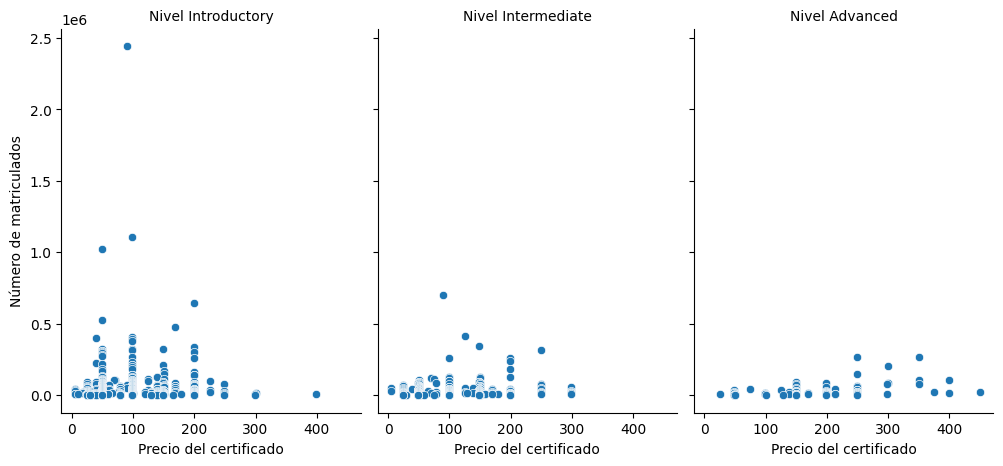

In [37]:
# Esta grafica nos ayuda a visualizar la dispersion de alumnos por el precio del certificado dividio en 3 columnas para ver en que niveles se concentran.
g = sns.FacetGrid(data=cursos, col='Level', col_wrap=3, height=4)

g.map(sns.scatterplot, 'price_certificate', 'n_enrolled')

g.set_axis_labels('Precio del certificado', 'Número de matriculados')
g.set_titles('Nivel {col_name}')

g.fig.set_figheight(5)
g.fig.set_figwidth(10)

plt.show()

### VISUALIZAREMOS LOS CURSOS CON MAYOR CANTIDAD DE MATRICULADOS

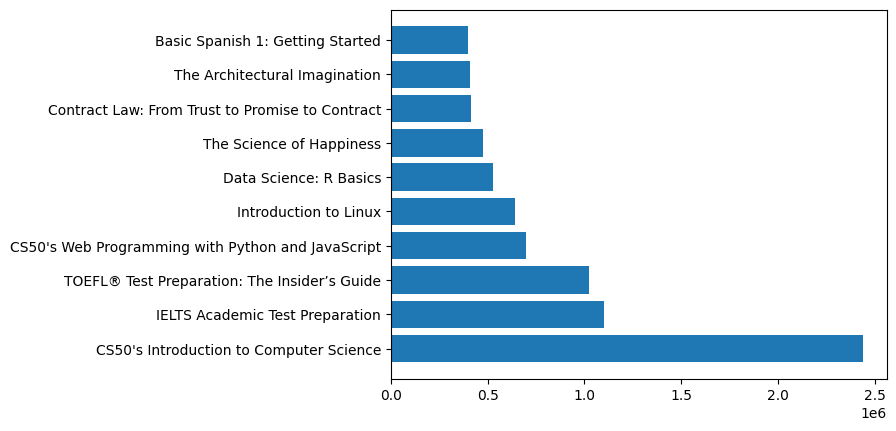

In [38]:
# Esta grafica sirve para visualizar cuales son los 10 primeros cursos segun el numero de matriculados
plt.barh(cursos_top_10['title'],cursos_top_10['n_enrolled'])
plt.show()

### VISUALIZAREMOS LAS 10 INSTITUCIONES CON MAYOR CANTIDAD DE MATRICULADOS

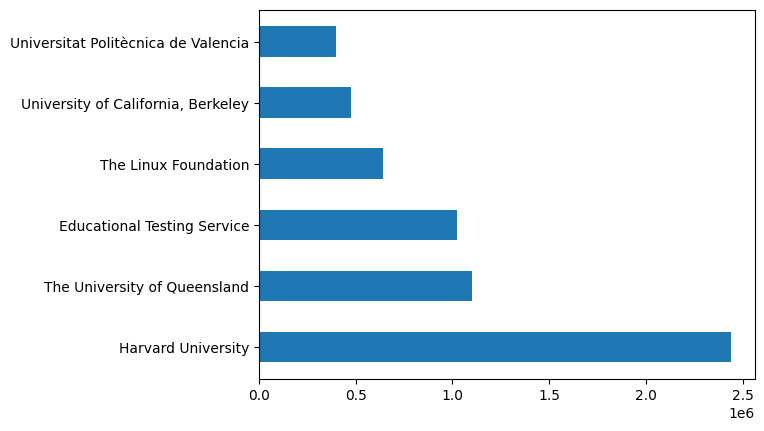

In [39]:
# Este grafica servira para visualizar los 10 primeros datos de la columna insitution segun el numero de matriculados
plt.barh(cursos_top_10['institution'],cursos_top_10['n_enrolled'],height=0.5)
plt.show()

### VISUALIZAREMOS LAS CATEGORIAS DEL TOP 10

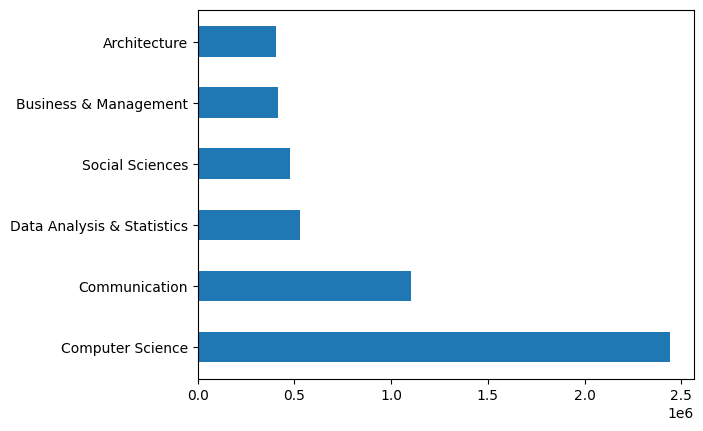

In [40]:
# Para saber cuales son las categorias con mas cursos
plt.barh(cursos_top_10['subject'],cursos_top_10['n_enrolled'],height=0.5)
plt.show()

### VISUALIZAREMOS LOS IDIOMAS DEL TOP 10

In [41]:
cursos['language'].value_counts()

English          776
Español          176
Français           7
Italiano           4
中文                 4
Português          4
日本語                1
Deutsch            1
اللغة العربية      1
Name: language, dtype: int64

In [42]:
cursos['language'] = cursos['language'].str.replace('中文', 'Chino')

In [43]:
cursos['language'] = cursos['language'].str.replace('日本語','Japones')

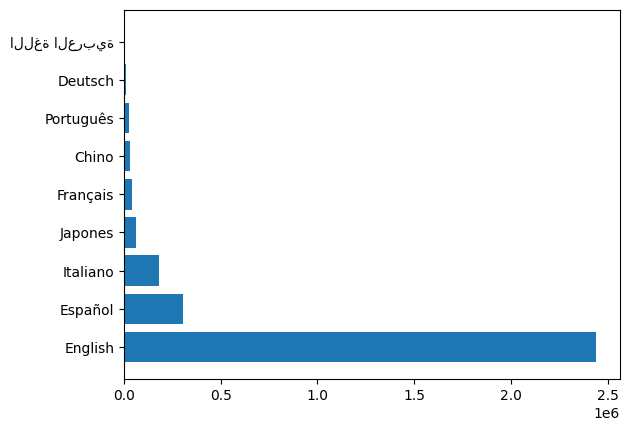

In [44]:
# Esta grafica sirve para visualizar los idiomas mas usados en los cursos
plt.barh(cursos['language'],cursos['n_enrolled'])
plt.show()

In [46]:
cursos.to_csv('edx_eda.csv',index=False)

#### CONCLUSIÓN: Después de un análisis exhaustivo de las gráficas y los datos recopilados durante el análisis exploratorio, se puede concluir que los cursos más demandados en la plataforma de edx pertenecen a la categoría de Ciencias de la Computación y se imparten en inglés. Además, estos cursos tienden a ser de nivel introductorio, lo que indica una gran demanda de conocimientos básicos en este campo.
#### Es importante destacar que, aunque los cursos en edx son gratuitos, al examinar los precios de los certificados emitidos al finalizarlos, se encontró que tienen un rango de alrededor de 200 dólares. Esto sugiere que los estudiantes interesados en obtener un certificado oficial están dispuestos a realizar una inversión considerable.

#### Dado que no se cuenta con una columna específica de calificaciones o rating, se utilizó la columna "n_enrolled" que indica la cantidad de alumnos matriculados como un indicador de la demanda de los cursos. Sin embargo, se recomienda implementar un sistema de calificaciones y retroalimentación directa de los estudiantes en tu propia plataforma para obtener una evaluación más precisa de la calidad de los cursos.

#### Al desarrollar tu propia plataforma de cursos en línea, es importante considerar otras variables clave que no están presentes en los datos actuales, como la calidad de los materiales de estudio, la experiencia de los instructores, la interacción entre los estudiantes y los recursos de aprendizaje disponibles.

#### En resumen, los cursos de Ciencias de la Computación en inglés, a nivel introductorio y con precios de certificación alrededor de 200 dólares, muestran una alta demanda en la plataforma de edx. No obstante, se requiere unas variables para que este analisis sea mas completo, por ejemplo el rating o calificacion del curso, fechas para determinar en que meses ingresaron mas alumnos por un curso, etc.